<a href="https://colab.research.google.com/github/goliakshay357/House-price-prediction/blob/master/Final3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
url_train = 'https://raw.githubusercontent.com/goliakshay357/Algorithms/master/train.csv'
url_test = 'https://raw.githubusercontent.com/goliakshay357/Algorithms/master/test_toup.csv'

In [0]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [41]:
train = pd.read_csv(url_train)
test = pd.read_csv(url_test)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,140,60,RL,65.0,15426,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,6,5,1997,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,821,Unf,0,107,928,GasA,...,Y,SBrkr,928,836,0,1764,1,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,1997.0,RFn,2,470,TA,TA,Y,276,99,0,0,0,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,231500
1,141,20,RL,70.0,10500,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,432,Unf,0,432,864,GasA,...,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,1,Po,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,ConLI,Normal,115000
2,142,20,RL,78.0,11645,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1300,Unf,0,434,1734,GasA,...,Y,SBrkr,1734,0,0,1734,1,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2005.0,Fin,2,660,TA,TA,Y,160,24,0,0,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal,260000
3,143,50,RL,71.0,8520,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,5,4,1952,1952,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,No,Rec,507,Unf,0,403,910,GasA,...,Y,SBrkr,910,475,0,1385,0,0,2,0,4,1,TA,6,Typ,0,NaN,Detchd,2000.0,Unf,2,720,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,166000
4,144,20,RL,78.0,10335,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,183.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,679,Unf,0,811,1490,GasA,...,Y,SBrkr,1501,0,0,1501,1,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,1999.0,RFn,2,577,TA,TA,Y,144,29,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,204000


In [42]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [0]:
#dropping ids
# print(" Train Before {}".format(train.shape))
# print(" Test Before {}".format(test.shape) )
# train.drop(columns=["Id"], axis = 1, inplace = True)
# test.drop(columns=["Id"], axis = 1, inplace = True)
# print(" Train After {}".format(train.shape))
# print(" Test After {}".format(test.shape) )

#Exploring target variable

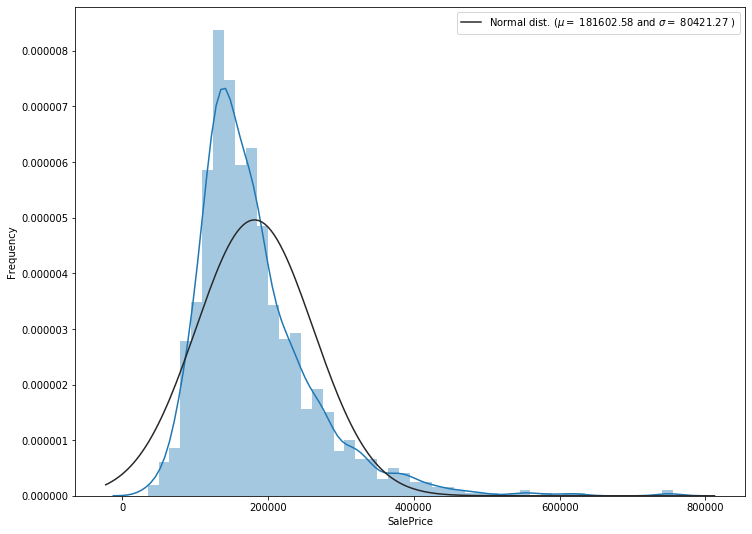

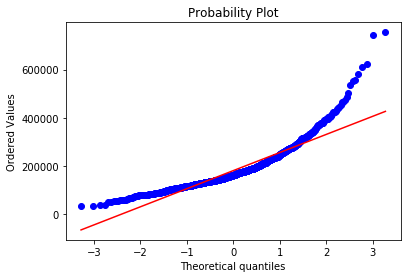

In [44]:

plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

output is right screwed as well make it normal


In [0]:
#applying log
train["SalePrice"] = np.log1p(train["SalePrice"])


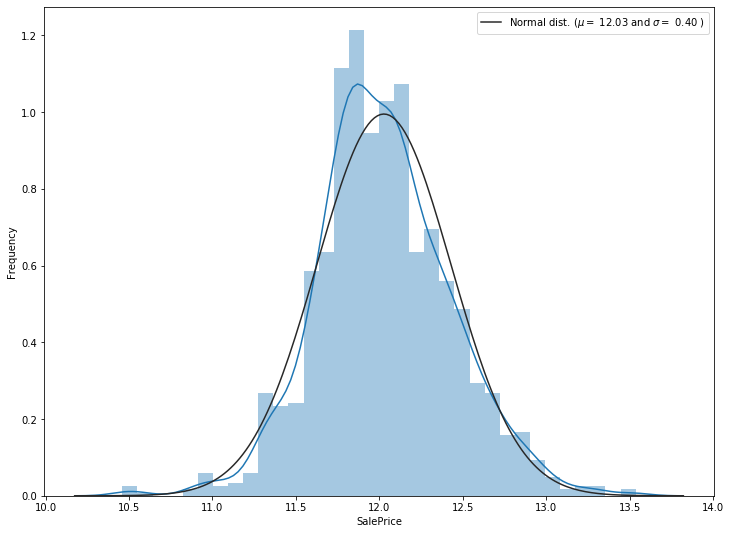

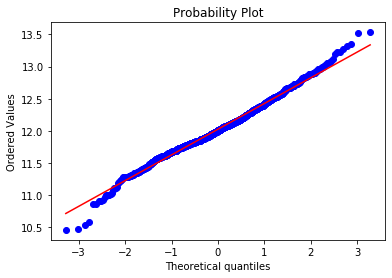

In [46]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

normally distributed!

#Combining test and train

In [47]:
train['type'] = 'train'
test['type'] = 'test'
y_train = train.SalePrice.values
train_test = pd.concat((train, test)).reset_index(drop=True)
#along columns
train_test.drop(['SalePrice'], axis=1, inplace=True)
train_test.shape


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


(1460, 81)

#Missing values Check

In [48]:
percentage_of_NaN = (train_test.isnull().sum()/train_test.isnull().count())*100
pd.DataFrame(percentage_of_NaN.round(2).sort_values()).T

,1stFlrSF,MiscVal,MSZoning,MSSubClass,LowQualFinSF,LotShape,LotConfig,LotArea,LandSlope,LandContour,KitchenQual,KitchenAbvGr,Id,HouseStyle,HeatingQC,YrSold,MoSold,HalfBath,Neighborhood,OverallCond,YearRemodAdd,YearBuilt,WoodDeckSF,Utilities,TotalBsmtSF,TotRmsAbvGrd,Street,ScreenPorch,SaleType,SaleCondition,RoofStyle,RoofMatl,PoolArea,PavedDrive,OverallQual,OpenPorchSF,GrLivArea,Heating,type,CentralAir,...,BsmtUnfSF,BsmtHalfBath,BsmtFullBath,ExterCond,ExterQual,Exterior1st,Exterior2nd,BsmtFinSF2,BsmtFinSF1,BldgType,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,BedroomAbvGr,3SsnPorch,2ndFlrSF,Condition2,Condition1,Electrical,MasVnrType,MasVnrArea,BsmtQual,BsmtFinType1,BsmtCond,BsmtFinType2,BsmtExposure,GarageType,GarageQual,GarageYrBlt,GarageCond,GarageFinish,LotFrontage,FireplaceQu,Fence,Alley,MiscFeature,PoolQC
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.55,0.55,2.53,2.53,2.53,2.6,2.6,5.55,5.55,5.55,5.55,5.55,17.74,47.26,80.75,93.77,96.3,99.52


#correlation MAtrix

In [0]:
corr = train.corr()

## Top 50% Corralation train attributes with sale-price

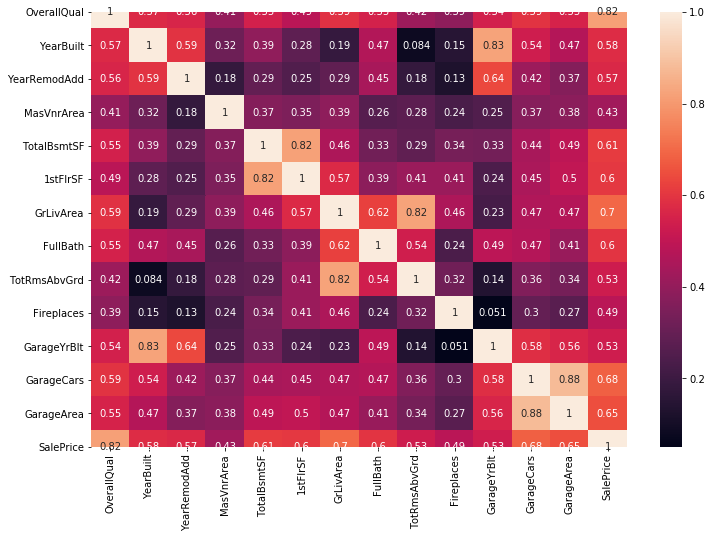

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [88]:
top_feature = corr.index[abs(corr['SalePrice']>0.4)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

top_feature

#imputing Train_Test missing values

In [0]:
#major missing
train_test.drop(["Alley",'Fence','MiscFeature','PoolQC'], axis=1, inplace=True)

In [52]:
percentage_of_NaN = (train_test.isnull().sum()/train_test.isnull().count())*100
pd.DataFrame(percentage_of_NaN.round(2).sort_values()).T

,1stFlrSF,MiscVal,MSZoning,MSSubClass,LowQualFinSF,LotShape,LotConfig,MoSold,LotArea,LandContour,KitchenQual,KitchenAbvGr,Id,HouseStyle,HeatingQC,LandSlope,Neighborhood,OpenPorchSF,OverallCond,YearRemodAdd,YearBuilt,WoodDeckSF,Utilities,TotalBsmtSF,TotRmsAbvGrd,Street,ScreenPorch,SaleType,SaleCondition,RoofStyle,RoofMatl,PoolArea,PavedDrive,OverallQual,YrSold,HalfBath,Heating,EnclosedPorch,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,CentralAir,Condition1,Condition2,GrLivArea,ExterCond,type,Functional,GarageCars,Exterior1st,Exterior2nd,GarageArea,ExterQual,Fireplaces,Foundation,FullBath,Electrical,MasVnrArea,MasVnrType,BsmtFinType1,BsmtCond,BsmtQual,BsmtFinType2,BsmtExposure,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,LotFrontage,FireplaceQu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.55,0.55,2.53,2.53,2.53,2.6,2.6,5.55,5.55,5.55,5.55,5.55,17.74,47.26


In [53]:
# df['status'].value_counts()
# train_test['FireplaceQu'].value_counts()
pd.DataFrame(train_test['FireplaceQu']).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
FireplaceQu,NaN,Po,NaN,NaN,NaN,NaN,NaN,NaN,Gd,NaN,NaN,NaN,Gd,Gd,Gd,NaN,NaN,NaN,Gd,Gd,Gd,NaN,Gd,Gd,NaN,NaN,NaN,Gd,Gd,Gd,TA,NaN,Gd,TA,TA,TA,Gd,TA,Gd,Gd,...,NaN,TA,TA,NaN,NaN,TA,Gd,NaN,NaN,NaN,TA,NaN,TA,Gd,Gd,TA,Fa,Po,NaN,TA,Gd,TA,NaN,NaN,NaN,TA,NaN,TA,TA,Fa,NaN,Gd,TA,NaN,NaN,TA,Gd,Fa,NaN,TA


In [0]:
#filling firplaceQu with None
train_test["FireplaceQu"] = train_test["FireplaceQu"].fillna("None")

In [55]:
train_test['FireplaceQu'].value_counts()
# pd.DataFrame(train_test['FireplaceQu']).T

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

In [0]:
# filling Lotfrontage with median
train_test["LotFrontage"] = train_test["LotFrontage"].fillna(train_test["LotFrontage"].median())

In [0]:
# no garage with None
train_test["GarageType"] = train_test["GarageType"].fillna('None')
train_test["GarageQual"] = train_test["GarageQual"].fillna('None')
train_test["GarageFinish"] = train_test["GarageFinish"].fillna('None')
train_test["GarageCond"] = train_test["GarageCond"].fillna('None')

In [58]:
percentage_of_NaN = (train_test.isnull().sum()/train_test.isnull().count())*100
pd.DataFrame(percentage_of_NaN.round(2).sort_values()).T


,1stFlrSF,MiscVal,MSZoning,MSSubClass,LowQualFinSF,LotShape,LotFrontage,LotConfig,LotArea,LandSlope,LandContour,KitchenQual,KitchenAbvGr,Id,HouseStyle,HeatingQC,MoSold,YrSold,Neighborhood,OverallCond,YearRemodAdd,YearBuilt,WoodDeckSF,Utilities,TotalBsmtSF,TotRmsAbvGrd,Street,ScreenPorch,SaleType,SaleCondition,RoofStyle,RoofMatl,PoolArea,PavedDrive,OverallQual,OpenPorchSF,HalfBath,Heating,type,BldgType,BsmtFullBath,BsmtHalfBath,BedroomAbvGr,BsmtUnfSF,CentralAir,Condition1,Condition2,GrLivArea,EnclosedPorch,ExterCond,3SsnPorch,2ndFlrSF,ExterQual,Exterior1st,Exterior2nd,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,BsmtFinSF1,BsmtFinSF2,Electrical,MasVnrType,MasVnrArea,BsmtCond,BsmtQual,BsmtFinType1,BsmtExposure,BsmtFinType2,GarageYrBlt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.55,0.55,2.53,2.53,2.53,2.6,2.6,5.55


In [0]:
# no car with 0
train_test["GarageYrBlt"] = train_test["GarageYrBlt"].fillna(0)

In [0]:
# dealing with BSmt as 0
train_test["BsmtFinType2"] = train_test["BsmtFinType2"].fillna(0)
train_test["BsmtExposure"] = train_test["BsmtExposure"].fillna(0)
train_test["BsmtFinType1"] = train_test["BsmtFinType1"].fillna(0)
train_test["BsmtQual"] = train_test["BsmtQual"].fillna(0)
train_test["BsmtCond"] = train_test["BsmtCond"].fillna(0)

In [61]:
percentage_of_NaN = (train_test.isnull().sum()/train_test.isnull().count())*100
pd.DataFrame(percentage_of_NaN.round(2).sort_values()).T


,1stFlrSF,MiscVal,MSZoning,MSSubClass,LowQualFinSF,LotShape,LotFrontage,LotConfig,LotArea,LandSlope,LandContour,KitchenQual,KitchenAbvGr,Id,HouseStyle,HeatingQC,MoSold,YrSold,Neighborhood,OverallCond,YearRemodAdd,YearBuilt,WoodDeckSF,Utilities,TotalBsmtSF,TotRmsAbvGrd,Street,ScreenPorch,SaleType,SaleCondition,RoofStyle,RoofMatl,PoolArea,PavedDrive,OverallQual,OpenPorchSF,HalfBath,Heating,GarageYrBlt,Condition1,CentralAir,BsmtUnfSF,BsmtQual,BsmtHalfBath,BsmtFullBath,BsmtFinType2,Condition2,BsmtFinType1,BsmtFinSF1,BsmtExposure,BsmtCond,BldgType,BedroomAbvGr,3SsnPorch,2ndFlrSF,BsmtFinSF2,GrLivArea,type,ExterCond,GarageType,GarageQual,GarageFinish,GarageCond,GarageCars,GarageArea,Functional,EnclosedPorch,FullBath,Fireplaces,FireplaceQu,Exterior2nd,Exterior1st,ExterQual,Foundation,Electrical,MasVnrArea,MasVnrType
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.55,0.55


In [0]:
train_test["MasVnrType"] = train_test["MasVnrType"].fillna("None")
train_test["MasVnrArea"] = train_test["MasVnrArea"].fillna(0)

In [0]:
# in electrical SBkr is reaping a lot
train_test['Electrical'] = train_test['Electrical'].fillna(train_test['Electrical'].mode()[0])

In [64]:
percentage_of_NaN = (train_test.isnull().sum()/train_test.isnull().count())*100
pd.DataFrame(percentage_of_NaN.round(2).sort_values()).T

,1stFlrSF,MasVnrType,MasVnrArea,MSZoning,MSSubClass,LowQualFinSF,LotShape,LotFrontage,LotConfig,LotArea,LandSlope,LandContour,KitchenQual,KitchenAbvGr,Id,HouseStyle,MiscVal,MoSold,Neighborhood,OpenPorchSF,YearRemodAdd,YearBuilt,WoodDeckSF,Utilities,TotalBsmtSF,TotRmsAbvGrd,Street,HeatingQC,ScreenPorch,SaleCondition,RoofStyle,RoofMatl,PoolArea,PavedDrive,OverallQual,OverallCond,SaleType,YrSold,Heating,GrLivArea,CentralAir,BsmtUnfSF,BsmtQual,BsmtHalfBath,BsmtFullBath,BsmtFinType2,BsmtFinType1,BsmtFinSF2,BsmtFinSF1,BsmtExposure,BsmtCond,BldgType,BedroomAbvGr,3SsnPorch,2ndFlrSF,Condition1,Condition2,Electrical,EnclosedPorch,GarageYrBlt,GarageType,GarageQual,GarageFinish,GarageCond,GarageCars,GarageArea,HalfBath,Functional,Foundation,Fireplaces,FireplaceQu,Exterior2nd,Exterior1st,ExterQual,ExterCond,FullBath,type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


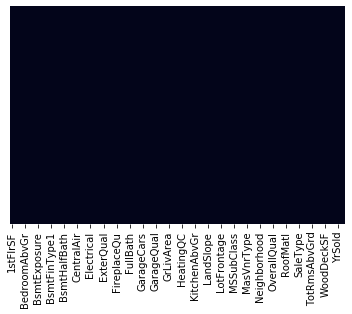

In [65]:
sns.heatmap(train_test.isnull(),yticklabels=False,cbar=False)

In [66]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
3SsnPorch        1460 non-null int64
BedroomAbvGr     1460 non-null int64
BldgType         1460 non-null object
BsmtCond         1460 non-null object
BsmtExposure     1460 non-null object
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtFinType1     1460 non-null object
BsmtFinType2     1460 non-null object
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
BsmtQual         1460 non-null object
BsmtUnfSF        1460 non-null int64
CentralAir       1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
Electrical       1460 non-null object
EnclosedPorch    1460 non-null int64
ExterCond        1460 non-null object
ExterQual        1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-nul

In [0]:
#chaning features to catogory
train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['OverallCond'] = train_test['OverallCond'].astype(str)
train_test['YrSold'] = train_test['YrSold'].astype(str)
train_test['MoSold'] = train_test['MoSold'].astype(str)

In [0]:
#new column making:
train_test['TotalSF'] = train_test['TotalBsmtSF'] + train_test['1stFlrSF'] + train_test['2ndFlrSF']

In [69]:
# get all cotegorial variables:
df_num = train_test.select_dtypes(exclude=[np.int,np.float64])
df_num.columns

Index(['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual',
       'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual',
       'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSSubClass',
       'MSZoning', 'MasVnrType', 'MoSold', 'Neighborhood', 'OverallCond',
       'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType',
       'Street', 'Utilities', 'YrSold', 'type'],
      dtype='object')

In [0]:
from sklearn.preprocessing import LabelEncoder
col_cat = ['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual',
       'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual',
       'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSSubClass',
       'MSZoning', 'MasVnrType', 'MoSold', 'Neighborhood', 'OverallCond',
       'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType',
       'Street', 'Utilities', 'YrSold']

for c in col_cat:
    lbl = LabelEncoder() 
    lbl.fit(list(train_test[c].values)) 
    train_test[c] = lbl.transform(list(train_test[c].values))

In [71]:
df_num = train_test.select_dtypes(exclude=[np.int,np.float64])
df_num.columns

Index(['type'], dtype='object')

In [72]:
train_test

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,type,TotalSF
0,928,836,0,3,0,4,4,821,0,3,6,1,0,3,107,1,2,2,4,0,4,3,12,13,3,0,2,2,6,470,2,5,2,5,1,1997.0,1764,1,1,0,5,140,1,2,3,0,15426,4,65.0,0,0,9,3,0.0,2,0,10,5,99,4,6,2,0,1,1,4,8,0,1,7,928,0,276,1997,1997,3,train,2692
1,864,0,0,3,0,4,4,432,0,1,6,0,0,4,432,1,2,2,4,0,4,3,6,6,4,1,1,1,6,0,0,3,1,3,6,0.0,864,0,1,4,2,141,1,3,3,0,10500,2,70.0,3,0,4,3,0.0,2,0,6,12,0,4,4,2,0,1,1,4,4,0,1,5,864,0,0,1971,1971,4,train,1728
2,1734,0,0,3,0,4,1,1300,0,3,6,1,0,3,434,1,2,2,4,0,4,2,12,13,3,0,2,2,6,660,2,5,0,5,1,2005.0,1734,0,1,0,2,142,1,2,3,0,11645,4,78.0,3,0,4,3,0.0,2,0,0,5,24,4,7,2,0,1,1,4,8,0,1,7,1734,0,160,2005,2005,0,train,3468
3,910,475,0,4,0,4,4,507,0,5,6,0,0,4,403,1,0,2,4,0,1,3,3,14,3,0,1,2,6,720,2,5,3,5,5,2000.0,1385,0,1,1,0,143,1,3,3,0,8520,0,71.0,3,0,8,3,0.0,2,0,8,12,0,3,5,2,0,1,1,4,8,0,1,6,910,0,0,1952,1952,4,train,2295
4,1501,0,0,3,0,4,2,679,0,3,6,1,0,3,811,1,2,2,4,0,4,2,12,13,3,0,2,2,6,577,2,5,2,5,1,1999.0,1501,0,1,0,2,144,1,2,3,0,10335,4,78.0,0,0,4,3,183.0,1,0,8,5,29,4,7,2,0,1,1,4,8,0,1,6,1490,0,144,1999,1999,3,train,2991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1721,0,0,3,0,4,4,570,0,5,6,0,0,4,891,1,2,2,4,180,4,3,9,10,5,1,1,2,2,440,2,5,2,5,1,1968.0,1721,1,1,2,2,135,1,3,3,0,10335,4,78.0,0,0,4,3,0.0,2,0,9,19,96,5,5,2,0,1,1,4,8,0,1,7,1461,0,0,1968,1993,0,test,3182
1456,1682,0,0,3,0,4,4,0,0,6,6,0,0,4,1304,1,2,2,4,0,4,3,9,10,2,1,2,2,6,530,2,5,3,5,1,1970.0,1682,0,1,2,2,136,1,3,3,0,10400,4,80.0,3,0,4,3,288.0,1,0,7,14,0,5,7,2,0,1,3,4,8,0,1,7,1304,0,98,1970,1970,2,test,2986
1457,1214,0,0,3,0,4,4,695,0,2,6,0,0,4,519,1,2,2,4,0,4,3,8,8,1,1,1,2,6,318,1,5,2,5,1,1967.0,1214,0,1,4,2,137,1,3,3,0,10355,0,69.0,0,0,4,3,196.0,1,0,9,12,111,4,5,2,0,1,1,4,8,0,1,5,1214,0,0,1967,1967,1,test,2428
1458,1959,0,0,5,2,4,4,0,0,6,6,0,0,4,1907,1,2,2,4,0,4,3,12,13,3,0,1,3,6,766,3,5,3,5,0,1989.0,1959,0,1,2,2,138,2,3,3,0,11070,4,82.0,3,0,14,3,70.0,1,0,9,11,0,4,7,2,0,1,1,3,8,0,1,9,1907,0,0,1988,1989,0,test,3866


In [73]:
#skrewed features:
from scipy.stats import norm, skew
numeric_feats = train_test.dtypes[train_test.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train_test[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(80).T


Skew in numerical features: 



,Utilities,MiscVal,PoolArea,Condition2,LotArea,3SsnPorch,Heating,LowQualFinSF,RoofMatl,LandSlope,KitchenAbvGr,BsmtFinSF2,ScreenPorch,BsmtHalfBath,EnclosedPorch,Condition1,MasVnrArea,LotFrontage,OpenPorchSF,BldgType,TotalSF,BsmtFinSF1,WoodDeckSF,TotalBsmtSF,RoofStyle,1stFlrSF,GrLivArea,BsmtUnfSF,2ndFlrSF,OverallCond,TotRmsAbvGrd,HalfBath,Fireplaces,GarageType,BsmtFullBath,HeatingQC,HouseStyle,FireplaceQu,MSSubClass,OverallQual,BedroomAbvGr,GarageArea,YrSold,Foundation,Neighborhood,FullBath,Id,BsmtFinType1,MasVnrType,GarageCars,YearRemodAdd,LotShape,YearBuilt,GarageFinish,MoSold,Exterior2nd,Exterior1st,LotConfig,BsmtExposure,KitchenQual,BsmtQual,MSZoning,ExterQual,ExterCond,SaleCondition,Electrical,BsmtCond,LandContour,BsmtFinType2,GarageQual,PavedDrive,CentralAir,GarageCond,SaleType,GarageYrBlt,Functional,Street
Skew,38.170678,24.45164,14.813135,13.158307,12.195142,10.293752,9.844972,9.00208,8.101068,4.808735,4.483784,4.250888,4.117977,4.099186,3.086696,3.016093,2.674865,2.406671,2.361912,2.24334,1.774874,1.683771,1.539792,1.522688,1.472282,1.375342,1.365156,0.919323,0.812194,0.692355,0.675646,0.675203,0.648898,0.641897,0.595454,0.482722,0.306439,0.304996,0.259224,0.216721,0.211572,0.179796,0.09617,0.091124,0.042078,0.036524,0.0,-0.057176,-0.073551,-0.342197,-0.503044,-0.609548,-0.612831,-0.617086,-0.672892,-0.692251,-0.725567,-1.134465,-1.136621,-1.421346,-1.475216,-1.733612,-1.828384,-2.562668,-2.73835,-3.059986,-3.071656,-3.159249,-3.188535,-3.248579,-3.305538,-3.526757,-3.58005,-3.864663,-3.865524,-4.08076,-15.502821


In [74]:
#Box Cox Transformation of (highly) skewed features
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index

lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    train_test[feat] = boxcox1p(train_test[feat], lam)

There are 77 skewed numerical features to Box Cox transform


In [0]:
train_test
train_test1 = train_test

In [0]:
# new = old[['A', 'C', 'D']].copy()
train_test = train_test[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea','type']].copy()

#modaling


In [93]:
final_train = train_test[train_test['type'] == 'train']
final_test = train_test[train_test['type'] == 'test']
print("{}".format(final_train.shape))
print("{}".format(final_test.shape))

final_test = final_test.drop(columns=['type'])
final_train = final_train.drop(columns=['type'])

(1321, 14)
(139, 14)


In [0]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [0]:
# #hyper parameter optimization"

# ## Hyper Parameter Optimization
# booster=['gbtree','gblinear']
# base_score=[0.25,0.5,0.75,1]

# n_estimators = [100, 500, 900, 1100, 1500]
# max_depth = [2, 3, 5, 10, 15]
# booster=['gbtree','gblinear']
# learning_rate=[0.05,0.1,0.15,0.20]
# min_child_weight=[1,2,3,4]

# # Define the grid of hyperparameters to search
# hyperparameter_grid = {
#     'n_estimators': n_estimators,
#     'max_depth':max_depth,
#     'learning_rate':learning_rate,
#     'min_child_weight':min_child_weight,
#     'booster':booster,
#     'base_score':base_score
#     }

In [0]:
# from sklearn.linear_model import Lasso

# model = Lasso(alpha=0)

# model.fit(final_train,y_train)
# y_pred = model.predict(final_test)
# y_pred = np.exp(y_pred)
# y_pred= y_pred.astype(int)
# # print(rmsle(testY, y_pred))

# # res = pd.DataFrame({"Model":['Linear Regression'],
# #                     "RMSLE": [rmsle(testY, y_pred)]})
# # Results = Results.append(res)
# pd.DataFrame(y_pred)

In [0]:
# rf_pred = pd.DataFrame(y_pred)
# # sub_df = pd.read_csv('samples_submission.csv')
# sub_df = test[test['type'] == 'test'][['Id']] 
# datasets = pd.concat([sub_df,rf_pred],axis = 1)
# datasets.columns = ['Id','SalePrice']
# datasets.to_csv('output2.csv',index=False)
# datasets

In [0]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
import xgboost
regressor=xgboost.XGBRegressor()
# random_cv = RandomizedSearchCV(estimator=regressor,
#             param_distributions=hyperparameter_grid,
#             cv=5, n_iter=50,
#             scoring = 'neg_mean_absolute_error',n_jobs = 4,
#             verbose = 5, 
#             return_train_score = True,
#             random_state=42)

In [99]:
random_cv.fit(final_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    8.6s


KeyboardInterrupt: ignored

In [0]:




# random_cv.best_estimator_

In [101]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_xgb.fit(final_train, y_train)
xgb_train_pred = model_xgb.predict(final_train)
xgb_pred = np.expm1(model_xgb.predict(final_test))
print(rmsle(y_train, xgb_train_pred))
xgb_pred = xgb_pred.astype(int)
pd.DataFrame(xgb_pred).T



0.1051654937103378


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138
0,193636,156912,210918,172795,300946,153141,254927,219490,192630,121117,126856,393847,108887,246952,133411,131384,140551,107583,157340,128566,359144,124363,264942,146244,146216,256626,133261,304595,192129,60387,98665,147630,199455,155101,276579,333352,159884,154675,139216,92334,...,98701,215794,173387,129259,214588,192455,270896,88455,104402,127099,202237,150202,168546,287577,211050,190703,172202,147939,157236,407667,165017,147584,95935,135712,171060,187471,72847,150329,85761,143365,143026,210993,200146,155025,196097,185399,188191,141451,270984,253532


In [84]:
test.Id

0        1
1        2
2        3
3        4
4        5
      ... 
134    135
135    136
136    137
137    138
138    139
Name: Id, Length: 139, dtype: int64

In [102]:
rf_pred = pd.DataFrame(xgb_pred)
# sub_df = pd.read_csv('samples_submission.csv')
sub_df = test[test['type'] == 'test'][['Id']] 
datasets = pd.concat([sub_df,rf_pred],axis = 1)
datasets.columns = ['Id','SalePrice']
datasets.to_csv('output2.csv',index=False)
datasets

,Id,SalePrice
0,1,193636
1,2,156912
2,3,210918
3,4,172795
4,5,300946
...,...,...
134,135,185399
135,136,188191
136,137,141451
137,138,270984


In [0]:
# plt.subplots(figsize=(12,9))
# sns.distplot(datasets['SalePrice'], fit=stats.norm)

# # Get the fitted parameters used by the function

# (mu, sigma) = stats.norm.fit(datasets['SalePrice'])

# # plot with the distribution

# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
# plt.ylabel('Frequency')

# #Probablity plot

# fig = plt.figure()
# stats.probplot(datasets['SalePrice'], plot=plt)
# plt.show()

In [87]:
# datasets["SalePrice"] = np.log1p(datasets["SalePrice"])

# datasets
y_train.values

AttributeError: ignored

In [0]:
#ao

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 77))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(final_train.values, y_train,validation_split=0.20, batch_size = 10, nb_epoch = 1000)


In [0]:

from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [0]:
ann_pred=classifier.predict(final_test)
ann_pred = ann_pred.astype(int)
rf_pred = pd.DataFrame(ann_pred)
# sub_df = pd.read_csv('samples_submission.csv')
sub_df = test[test['type'] == 'test'][['Id']] 
datasets = pd.concat([sub_df,rf_pred],axis = 1)
datasets.columns = ['Id','SalePrice']
datasets.to_csv('output2.csv',index=False)
datasets